# plot HRM using plons

In [5]:
import plons
import os
import numpy as np
import matplotlib.pyplot        as plt

import plons.ConversionFactors_cgs        as cgs
import plons.AccrDisk                     as ad

In [6]:
'''
Plot of scale heights and total mass ifo r for 1 model, different dumps
'''
def plotHM_diffDumps(model,dumps,xH):
    run    = '/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/'+str(model)+'_T3000_res8_racc01/'
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    lineStyles = ['-.','--','-',':']
    i = 0
    for dump in dumps:
        # For all dumps, read in info about r, scale heights, mass
        (r,SH,Mtot,MrelRstep) = ad.readInfoAccrDisk(run,dump,xH)
        ax1.plot(r[1:],(SH[1:]),linestyle = lineStyles[i],label=str(dump))#,c = CB_color_cycle[2*i+1])
        ax2.plot(r[1:],(Mtot[1:]),linestyle = lineStyles[i],label=str(dump))#,c = CB_color_cycle[2*i+1])
        i = i+1
        
    # Construct plots
    ax1.legend(fontsize = 12)
    ax1.set_xlabel(r'r [au]',fontsize = 12)
    ax1.set_ylabel(xH+r'(r) [au]',fontsize = 12,rotation = 90)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)

    ax2.legend(fontsize = 12)
    ax2.set_xlabel(r'r [au]',fontsize = 12)
    ax2.set_ylabel(r'M(r) [$M_\odot$]',fontsize = 12,rotation = 90)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)

    fig1.savefig(run+'/plotsAnalysis/diffDumps_SHvsR_wind_00'+str(dump)+'_'+xH+'.png')
    fig2.savefig(run+'/plotsAnalysis/diffDumps_MvsR_wind_00'+str(dump)+'_'+xH+'.png')

In [18]:
'''
Plot of scale heights, total mass and relative added mass ifo r for 3 different models, same dump
'''
def plotHMrM_3models(modelNames,dump,xH):
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    fig4, ax4 = plt.subplots()
    lineStyles = ['-.','--',':','-','-']
    SHmaxi = []
    Mtmaxi = []
    radii  = []
    colors = ['firebrick','goldenrod','navy']
    i = 0
    maxX = 0
    # Read in info about r, scale heights, masses and relative added mas
    for model in modelNames:
        run    = '/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/'+str(model)+'_T3000_res8_racc01/'
        (r,SH,Mtot,MrelRstep) = ad.readInfoAccrDisk(run,dump,xH)
        ax1.plot(r[1:],(SH[1:]),linestyle = lineStyles[i],c = colors[i],label=str(model))#,c = CB_color_cycle[2*i+1])
        ax2.plot(r[1:],(Mtot[1:]),linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        ax3.plot(r[1:],(MrelRstep[1:]),linestyle = lineStyles[i],c = colors[i], label=str(model))#,c = CB_color_cycle[2*i+1])
        ax4.plot(r[1:],(SH[1:]/r[1:]),linestyle = lineStyles[i],c = colors[i],label=str(model))#,c = CB_color_cycle[2*i+1])
        maxXM = np.max(r[1:])
        SHmaxi = np.append(SHmaxi,np.max(SH[1:]))
        Mtmaxi = np.append(Mtmaxi,np.max(Mtot[1:]))
        radii  = np.append(radii ,np.max(r))
        if maxXM > maxX:
            maxX = maxXM
        i = i+1

    print('The radii are ',radii)
    # Construct plots
    ax1.legend(fontsize = 12)
    ax1.set_xlabel(r'r [au]',fontsize = 12)
    ax1.set_ylabel(xH+r'(r) [au]',fontsize = 12,rotation = 90)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.hlines(y=SHmaxi,xmin=0,xmax=radii,linewidth = 0.6, color = colors,linestyle = ':')#,label='criterium')
    ax1.vlines(x=radii,ymin = 0, ymax = SHmaxi, color = colors,linestyle = ':',linewidth=0.6)#, label ='r')

    ax2.legend(fontsize = 12)
    ax2.set_xlabel(r'r [au]',fontsize = 12)
    ax2.set_ylabel(r'M(r) [$M_\odot$]',fontsize = 12,rotation = 90)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax2.hlines(y=Mtmaxi,xmin=0,xmax=radii,linewidth = 0.6, color = colors,linestyle = ':')#,label='criterium')
    ax2.vlines(x=radii,ymin = 0, ymax = Mtmaxi, color = colors,linestyle = ':',linewidth=0.6)#, label ='r')


    ax3.legend(fontsize = 12)
    ax3.set_xlabel(r'r [au]',fontsize = 12)
    ax3.set_ylabel(r'Mrel/rstep []',fontsize = 12,rotation = 90)
    ax3.tick_params(axis='x', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)
    crit = 0.3
    ax3.hlines(y=crit,xmin=0,xmax=maxX,linewidth = 0.5, color = 'k',linestyle = 'dotted',label='criterium')
    ax3.plot(radii[0],0,'*',color = colors[0])
    ax3.plot(radii[1],0,'*',color = colors[1])
    ax3.plot(radii[2],0,'*',color = colors[2])
    
    ax4.legend(fontsize = 12)
    ax4.set_xlabel(r'r [au]',fontsize = 12)
    ax4.set_ylabel(xH+r'(r)/r []',fontsize = 12,rotation = 90)
    ax4.tick_params(axis='x', labelsize=12)
    ax4.tick_params(axis='y', labelsize=12)
    # ax4.vlines(x=radii,ymin = 0, ymax = Mtmaxi, color = colors,linestyle = ':',linewidth=0.6)#, label ='r')

    fig1.savefig('/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/plotsAnalysis/e00Models_SHvsR_wind_00'+str(dump)+'_'+xH+'.png')
    fig2.savefig('/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/plotsAnalysis/e00Models_MvsR_wind_00'+str(dump)+'_'+xH+'.png')
    fig3.savefig('/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/plotsAnalysis/e00Models_Mrel:rstep_wind_00'+str(dump)+'_'+xH+'.png')
    fig4.savefig('/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/plotsAnalysis/e00Models_SH:r_wind_00'+str(dump)+'_'+xH+'.png')


In [8]:
'''
Plot of scale heights and total mass ifo r for 1 model, 1 dump, 4 thetaregions
'''
def plotHM_diffThetaRegions(dump,model,xH):
    run    = '/lhome/jolienm/Documents/TierModels/R_Aql/cooling/binariesInPaper/finalAccrDisks/'+str(model)+'_T3000_res8_racc01/'
    thetas = ['0','pi:2','pi','pi3:2']
    lineStyles = ['-.','--',':','-','-']
    colors = ['firebrick','goldenrod','navy','lime','k']
    
    fig, ((ax1),(ax2)) = plt.subplots(nrows = 1, ncols= 2 , figsize=(19, 7))
    # read files with data for r, scale height and mass for different theta regions
    # safe maximal scale heights, radii and masses for plot
    SHmaxi = []
    radii  = []
    masses = []
    i = 0
    for theta in thetas:
        file = os.path.join(run,'plotsAnalysis/infoAccrDisk_theta~'+str(theta)+'_wind_00'+str(dump)+'_'+xH+'.txt')
        (r, SH, Mtot) = np.loadtxt(file, skiprows=11, usecols=(0,1,2), unpack=True)
        ax1.plot(r[1:],(SH[1:]),linestyle = lineStyles[i],color = colors[i],label=r'$\theta \sim$'+str(theta))#,c = CB_color_cycle[2*i+1])
        ax2.plot(r[1:],(Mtot[1:]),linestyle = lineStyles[i],color = colors[i],label=r'$\theta \sim$'+str(theta))#,c = CB_color_cycle[2*i+1])
        SHmaxi = np.append(SHmaxi,np.max(SH))
        radii  = np.append(radii ,np.max(r))
        masses = np.append(masses,np.max(Mtot))
        i = i+1

    # Same for full dump
    (r,SH,Mtot,MrelRstep) = ad.readInfoAccrDisk(run,dump,xH)
    SHmaxi = np.append(SHmaxi,np.max(SH))
    radii  = np.append(radii ,np.max(r))
    masses = np.append(masses,np.max(Mtot))

    # Make plots
    ax1.plot(r[1:],(SH[1:]),linestyle = lineStyles[i],label='full',color = colors[i],linewidth = 0.6)#,c = CB_color_cycle[2*i+1])
    ax1.hlines(y=SHmaxi,xmin=0,xmax=radii,linewidth = 0.6, color = colors,linestyle = ':')#,label='criterium')
    ax1.vlines(x=radii,ymin = 0, ymax = SHmaxi, color = colors,linestyle = ':',linewidth=0.6)#, label ='r')
    ax1.legend(fontsize = 16)
    ax1.set_xlabel(r'r [au]',fontsize = 16)
    ax1.set_ylabel(xH+r'(r) [au]',fontsize = 16,rotation = 90)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    ax1.set_xlim(0.02,1.01*np.max(radii))
    ax1.set_ylim(0.005,1.01*np.max(SHmaxi))

    ax2.plot(r[1:],(Mtot[1:]),linestyle = lineStyles[i],label='full',color = colors[i],linewidth = 0.6)#,c = CB_color_cycle[2*i+1])
    ax2.hlines(y=masses,xmin=0,xmax=radii,linewidth = 0.6, color = colors,linestyle = ':')#,label='criterium')
    ax2.vlines(x=radii,ymin = 0, ymax = masses, color = colors,linestyle = ':',linewidth=0.6)#, label ='r')
    # ax2.legend(fontsize = 16)
    ax2.set_xlabel(r'r [au]',fontsize = 16)
    ax2.set_ylabel(r'M(r) [$M_\odot$]',fontsize = 16,rotation = 90)
    ax2.tick_params(axis='x', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16)

    ax2.set_xlim(0.02,1.01*np.max(radii))
    ax2.set_ylim(0,1.01*np.max(masses))

    fig.savefig(run+'/plotsAnalysis/diffThetas_SH_M_R_wind_00'+str(dump)+'_'+xH+'.png')

EXAMPLES (all my models, all options):

In [1]:
'''
Plot of scale heights and total mass ifo r for 1 model, different dumps
'''
xH    = '1H'
model = 'v20e50'
dumps = [250,266,277,292]
plotHM_diffDumps(model,dumps,xH)
model = 'v10e50'
dumps = [245,263,277,292]
plotHM_diffDumps(model,dumps,xH)
model = 'v05e50'
dumps = [245,263,277,292]
plotHM_diffDumps(model,dumps,xH)
xH    = '2H'
model = 'v20e50'
dumps = [250,266,277,292]
plotHM_diffDumps(model,dumps,xH)
model = 'v10e50'
dumps = [245,263,277,292]
plotHM_diffDumps(model,dumps,xH)
model = 'v05e50'
dumps = [245,263,277,292]
plotHM_diffDumps(model,dumps,xH)

'\nPlot of scale heights and total mass ifo r for 1 model, different dumps\n'

The radii are  [0.94 0.75 0.37]
The radii are  [0.86 0.75 0.36]


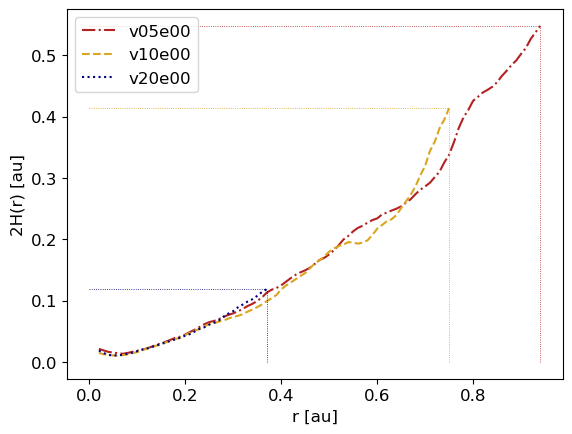

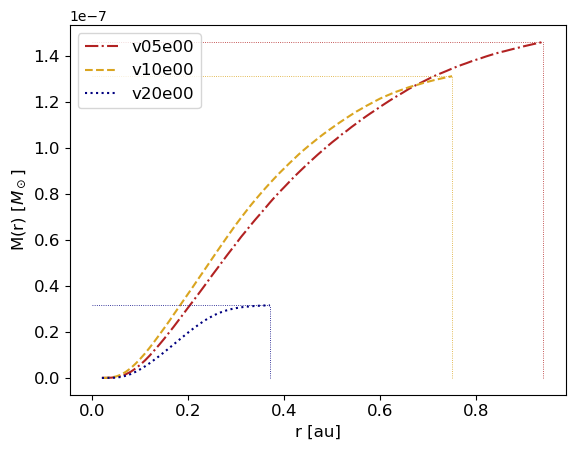

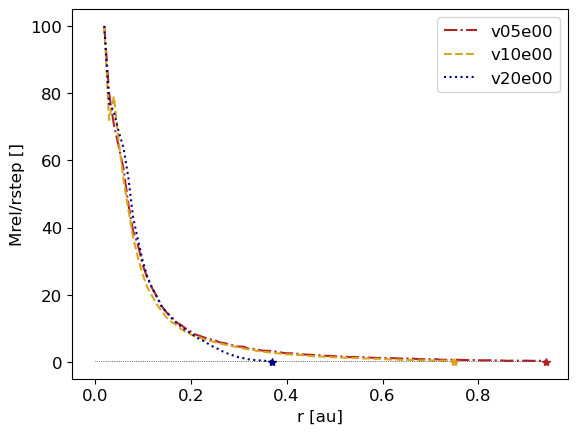

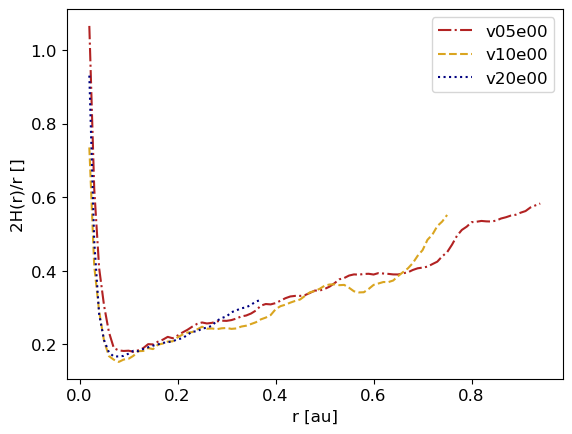

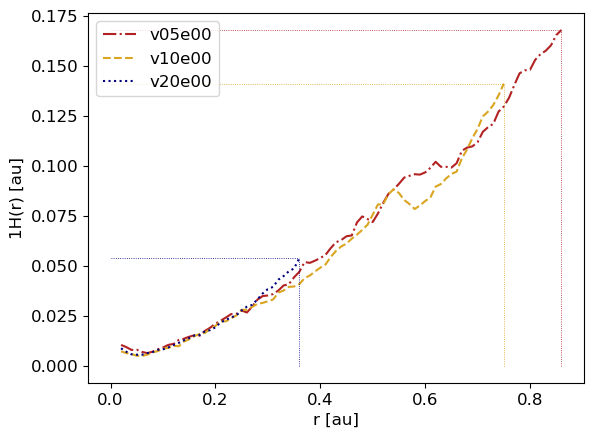

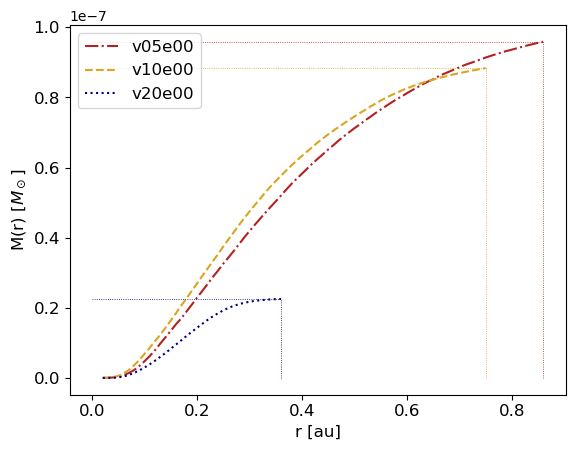

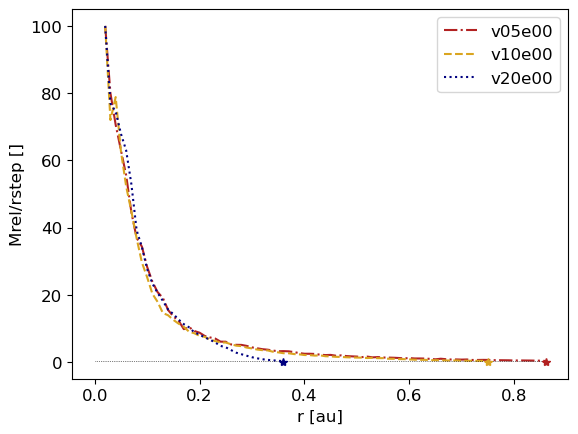

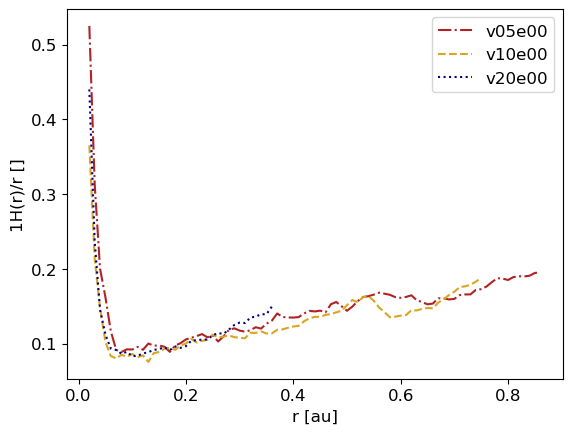

In [20]:
'''
Plot of scale heights, total mass and relative added mass ifo r for 3 different models, same dump
'''
modelNames = ['v05e00','v10e00','v20e00']
dump = 292
xH   = '2H'
plotHMrM_3models(modelNames,dump,xH)
xH   = '1H'
plotHMrM_3models(modelNames,dump,xH)

In [3]:
'''
Plot of scale heights and total mass ifo r for 1 model, 1 dump, 4 thetaregions
'''
dump = 292
xH = '1H'
model = 'v20e00'
plotHM_diffThetaRegions(dump,model,xH)
model = 'v10e00'
plotHM_diffThetaRegions(dump,model,xH)
model = 'v05e00'
plotHM_diffThetaRegions(dump,model,xH)
xH = '2H'
model = 'v20e00'
plotHM_diffThetaRegions(dump,model,xH)
model = 'v10e00'
plotHM_diffThetaRegions(dump,model,xH)
model = 'v05e00'
plotHM_diffThetaRegions(dump,model,xH)

'\nPlot of scale heights and total mass ifo r for 1 model, 1 dump, 4 thetaregions\n'